Text(0, 0.5, 'Frequency')

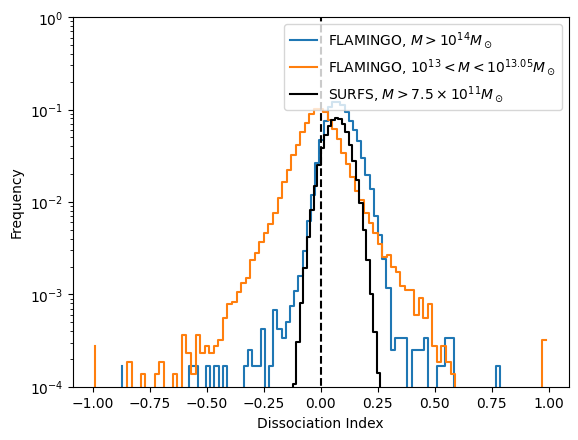

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S14.hdf5",'r')
S14=np.array(f['S'])
bin14=np.array(f['bin'])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S13.hdf5",'r')
S13=np.array(f['S'])
bin13=np.array(f['bin'])
f.close()
#print(bin13)
fig=plt.figure()    
ax=fig.add_subplot(111)
bins=np.linspace(-0.2,0.4,40)
ax.plot(bin14,S14,label=r"FLAMINGO, $M>10^{14}M_\odot$",drawstyle='steps')
ax.plot(bin13,S13,label=r"FLAMINGO, $10^{13}<M<10^{13.05}M_\odot$",drawstyle='steps')
ax.plot(bins,0.08190315*np.exp(-(bins-0.078895)**2/2/0.0512119**2),label=r"SURFS, $M>7.5\times 10^{11}M_\odot$",color='k',drawstyle='steps')
ax.legend()

ax.set_yscale("log")
ax.set_xlabel("Dissociation Index")
ax.vlines(0,10**-5,1000,linestyle='--',color='k')
ax.set_ybound(10**-4,1)
#ax.set_xbound(-0.5,0.5)
ax.set_ylabel("Frequency")

0.35131772122004523 0.10373533026113294 0.06817716737212284 0.11154696432302337
[[   10]
 [ 1596]
 [ 2260]
 [ 2795]
 [ 3918]
 [ 4138]
 [ 4198]
 [ 5718]
 [ 6722]
 [ 7109]
 [ 7406]
 [ 7924]
 [ 8310]
 [ 8736]
 [ 9699]
 [10229]
 [10436]
 [11335]
 [11638]
 [11778]
 [11866]]


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_8065/1794418694.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


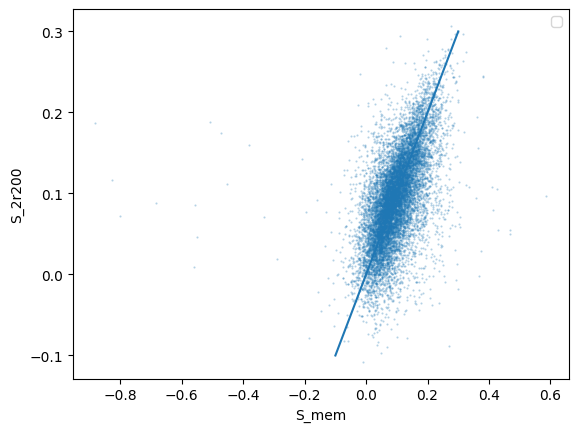

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S_compare.hdf5",'r')
S_c=np.array(f["central"])
S_m=np.array(f["central_sat"])

S_r=np.array(f["r200"])
S_r2=np.array(f["2r200"])
#S_r5=np.array(f["5r200"])
print(S_c[659],S_m[659],S_r[659],S_r2[659])
print(np.argwhere((S_m>0.3)*(S_r2<0.2)*(S_c<10)*(S_r2<10)))
f.close()
S_c=S_c[S_c<10]
S_m=S_m[S_m<10]
S_r=S_r[S_r<10]
S_r2=S_r2[S_r2<10]
#S_r5=S_r5[S_r5<10]

fig = plt.figure()
ax=plt.subplot(1,1,1)
#ax.scatter(S_c,S_m,color='r',s=0.2,alpha=0.1,label="central_sat")
#ax.scatter(S_c,S_r,color='b',s=0.2,alpha=0.1,label="r200")
#ax.scatter(S_c,S_r2,color='k',s=0.3,alpha=0.3,label="2r200")
ax.scatter(S_m,S_r2,s=0.3,alpha=0.3)#,label="r200")
ax.plot(np.linspace(-0.1,0.3,20),np.linspace(-0.1,0.3,20))
#ax.hlines(1,-1,1)
ax.legend()
ax.set_xlabel("S_mem")
ax.set_ylabel("S_2r200")

#ax.set_yscale("log")
fig.savefig("/Users/24756376/plot/Flamingo/L1000N0900/Dissociation_compare_mem_2r200.png")